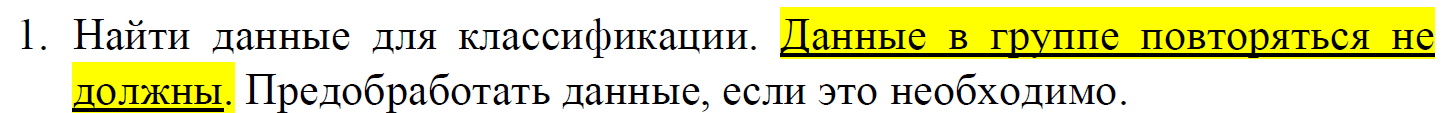

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('heart_attack.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
print(data.describe())

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

#### **Описание датасета**

Этот набор данных даёт представление о классификации сердечных приступов.
Этот набор данных идеально подходит для создания моделей классификации.

Характеристики:
- **age**: Возраст пациента
- **sex**: Пол пациента
- **cp**: Тип боли в груди
    - 0 - типичная стенокардия;
    - 1 - атипичная стенокардия;
    - 2 - боль, не связанная со стенокардией;
    - 3 - бессимптомное течение, артериальное давление в покое.
- **trtbps**: Артериальное давление в покое (в мм рт. ст.)
- **chol**: Холестерин в мг/дл, полученный с помощью датчика ИМТ
- **fbs**: (уровень сахара в крови натощак > 120 мг/дл) (1 = да; 0 = нет)
- **restecg**: Результаты электрокардиограммы в состоянии покоя
    - 0 - в норме,
    - 1 - наличие аномалии зубца ST-T (инверсия зубца T и/или подъем или депрессия сегмента ST > 0,05 мВ),
    - 2 - наличие вероятной или определенной гипертрофии левого желудочка по критериям Эстеса.
- **thalachh**: Максимальная достигнутая частота сердечных сокращений
- **exng**: Ангина, вызванная физической нагрузкой (1 = да; 0 = нет)
- **oldpeak**: Предыдущий пик
- slp
- **caa**: количество крупных сосудов (0-3)
- **thall** - коэффициент
- **output**: целевая переменная

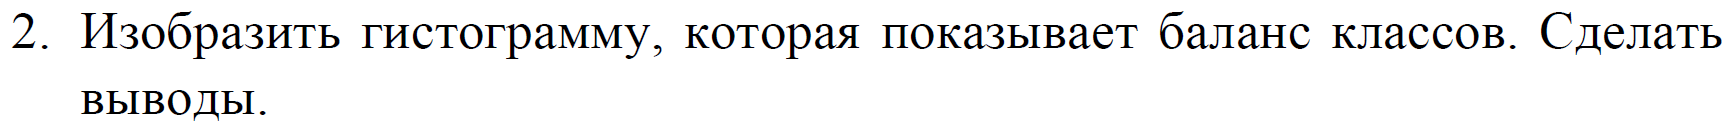

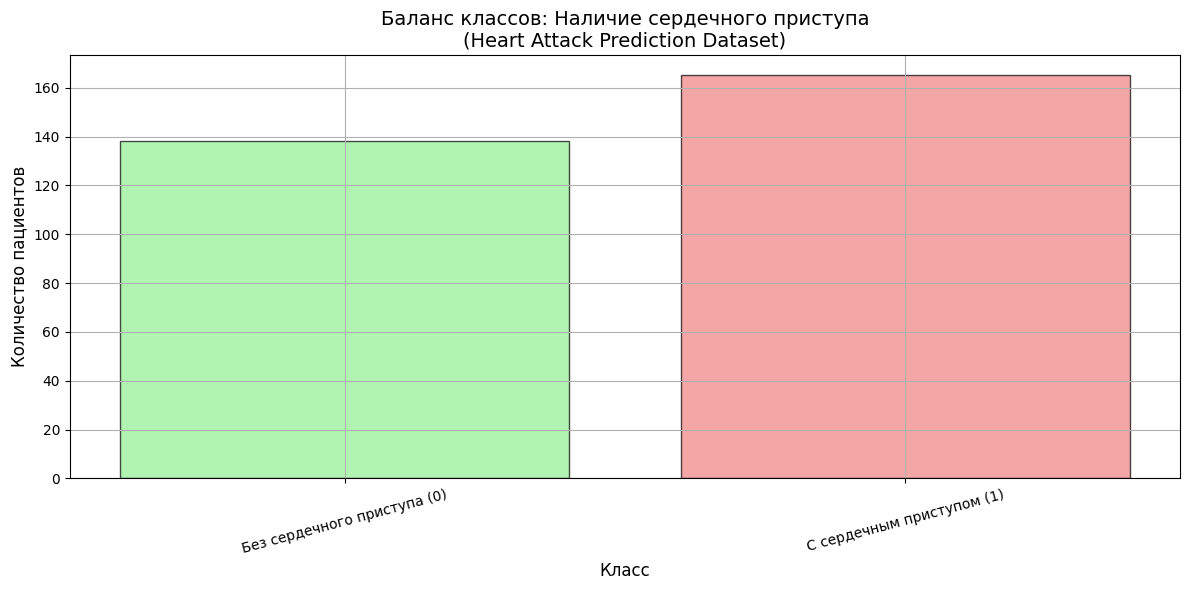

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Создаем фигуру
plt.figure(figsize=(12, 6))

# Подсчет классов
class_counts = data['output'].value_counts().sort_index()
class_labels = ['Без сердечного приступа (0)', 'С сердечным приступом (1)']
colors = ['lightgreen', 'lightcoral']
bars = plt.bar(class_labels, class_counts.values, color=colors, alpha=0.7, edgecolor='black')

# аннотации
'''for bar, count, percentage in zip(bars, class_counts.values, class_counts.values/len(df)*100):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{count}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=12, fontweight='bold')
'''
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество пациентов', fontsize=12)
plt.title('Баланс классов: Наличие сердечного приступа\n(Heart Attack Prediction Dataset)',
          fontsize=14)
plt.grid()
plt.xticks(rotation=15)
'''plt.text(0.02, 0.98, f'Всего пациентов: {len(data)}',
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))'''
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd

# Создаем DataFrame для удобства
df_balance = pd.DataFrame({
    'Class': class_labels,
    'Count': class_counts,
    'Percentage': [count/len(y)*100 for count in class_counts]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_balance, x='Class', y='Count', palette='viridis')

# Добавляем аннотации
for i, (count, pct) in enumerate(zip(class_counts, df_balance['Percentage'])):
    ax.text(i, count + 0.1, f'{count}\n({pct:.1f}%)',
            ha='center', va='bottom')

plt.xlabel('Классы')
plt.ylabel('Количество образцов')
plt.title('Распределение классов в наборе данных')
plt.grid(axis='y', alpha=0.3)
plt.show()

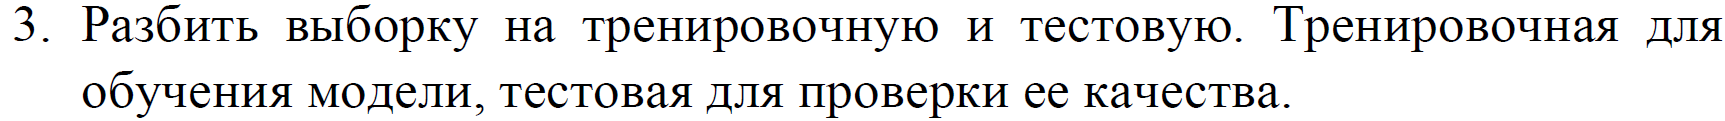

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [16]:
x = data.drop('output', axis=1)
y = data['output']

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', RandomForestClassifier())
])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

print(f'Размер признаков для обучающей выборки: {x_train.shape}')
print(f'Размер признаков для тестовой выборки: {x_test.shape}')
print(f'Размер целевой переменной обучающей выборки: {y_train.shape}')
print(f'Размер для показателя целевой выборки: {y_test.shape}')

Размер признаков для обучающей выборки: (242, 13)
Размер признаков для тестовой выборки: (61, 13)
Размер целевой переменной обучающей выборки: (242,)
Размер для показателя целевой выборки: (61,)


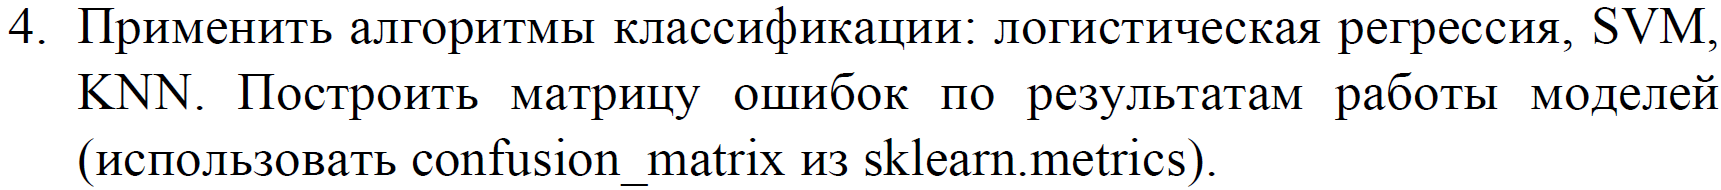

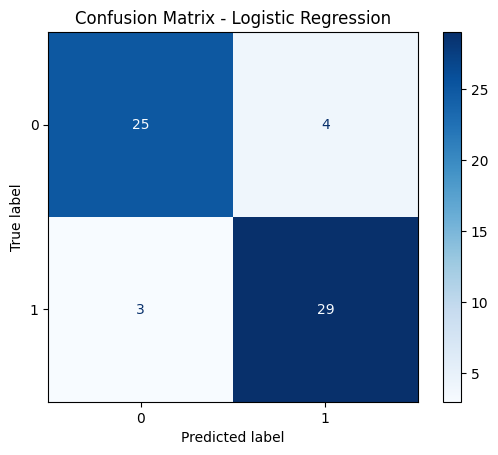

In [17]:
lr_pipeline = Pipeline(
    steps=[
        ('classifier', LogisticRegression(max_iter=1000))
        ])
lr_params = {'classifier__C': [0.1, 1, 10]}
lr_grid_search = GridSearchCV(lr_pipeline, lr_params, cv=6, scoring='roc_auc', n_jobs=-1)
lr_grid_search.fit(x_train, y_train)

best_lr = lr_grid_search.best_estimator_
y_pred_lr = best_lr.predict(x_test)
y_prob_lr = best_lr.predict_proba(x_test)[:, 1]

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
precision_lr, recall_lr, treshold_lr = precision_recall_curve(y_test, y_prob_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Confusion Matrix
ConfusionMatrixDisplay(cm_lr, display_labels=best_lr.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

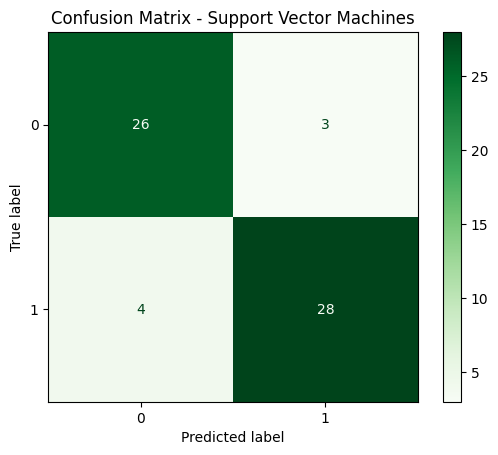

In [18]:
# Support Vector Machines
svc_pipeline = Pipeline(steps=[('classifier', SVC(probability=True))])
svc_params = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
    }
svc_grid_search = GridSearchCV(svc_pipeline, svc_params, cv=5, scoring='roc_auc', n_jobs=-1)
svc_grid_search.fit(x_train, y_train)

best_svc = svc_grid_search.best_estimator_
y_pred_svc = best_svc.predict(x_test)
y_prob_svc = best_svc.predict_proba(x_test)[:, 1]

accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
precision_svc, recall_svc, treshold_svc = precision_recall_curve(y_test, y_prob_svc)
cm_svc = confusion_matrix(y_test, y_pred_svc)

ConfusionMatrixDisplay(cm_svc, display_labels=best_svc.classes_).plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Support Vector Machines')
plt.show()

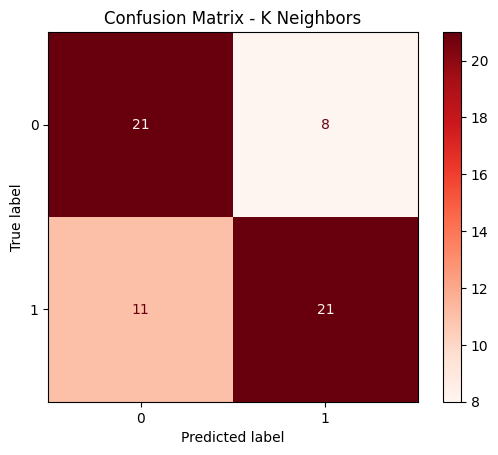

In [19]:
# KNN
knn_pipeline = Pipeline(steps=[('classifier', KNeighborsClassifier())])
knn_params = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__metric': ['l1', 'l2']
    }
knn_grid_search = GridSearchCV(knn_pipeline, knn_params, cv=6, scoring='roc_auc', n_jobs=-1)
knn_grid_search.fit(x_train, y_train)

best_knn = knn_grid_search.best_estimator_
y_pred_knn = best_knn.predict(x_test)
y_prob_knn = best_knn.predict_proba(x_test)[:, 1]

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
precision_knn, recall_knn, treshold_knn = precision_recall_curve(y_test, y_prob_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

ConfusionMatrixDisplay(cm_knn, display_labels=best_knn.classes_).plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix - K Neighbors')
plt.show()

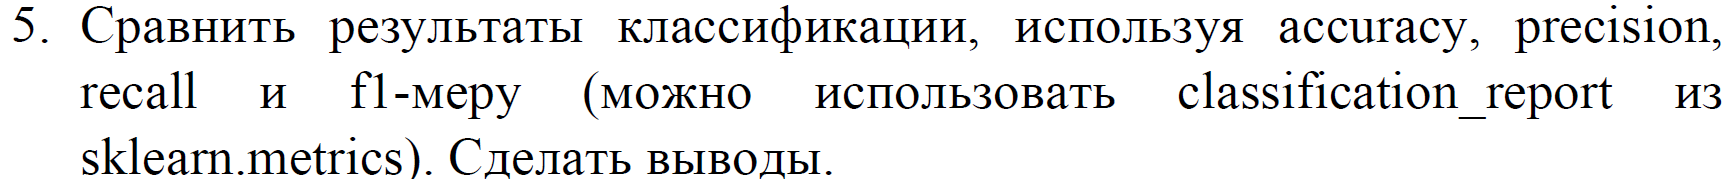


In [23]:
print('Модель: Logistic Regression')
print(f'Лучшие параметры: {lr_grid_search.best_params_}')
print(f'Accuracy: {accuracy_lr:.3f}')
print(f'Precision: {precision_lr[0]:.3f}')
print(f'Recall: {recall_lr[0]:3f}')
print(f'F1-метрика: {f1_lr:.3f}')

print('\nМодель: Support Vector Machines')
print(f'Лучшие параметры: {svc_grid_search.best_params_}')
print(f'Accuracy: {accuracy_svc:.3f}')
print(f'Precision: {precision_svc[0]:.3f}')
print(f'Recall: {recall_svc[0]:3f}')
print(f'F1-метрика: {f1_svc:.3f}')

print('\nМодель: K Neighbors')
print(f'Лучшие параметры: {knn_grid_search.best_params_}')
print(f'Accuracy: {accuracy_knn:.3f}')
print(f'Precision: {precision_knn[0]:.3f}')
print(f'Recall: {recall_knn[0]:3f}')
print(f'F1-метрика: {f1_knn:.3f}')


Модель: Logistic Regression
Лучшие параметры: {'classifier__C': 0.1}
Accuracy: 0.885
Precision: 0.525
Recall: 1.000000
F1-метрика: 0.885

Модель: Support Vector Machines
Лучшие параметры: {'classifier__C': 10, 'classifier__kernel': 'linear'}
Accuracy: 0.885
Precision: 0.525
Recall: 1.000000
F1-метрика: 0.885

Модель: K Neighbors
Лучшие параметры: {'classifier__metric': 'l1', 'classifier__n_neighbors': 3}
Accuracy: 0.689
Precision: 0.525
Recall: 1.000000
F1-метрика: 0.689
